# **Project 2** 
*Visualization Replication Part*

### **Team Members**
&nbsp;Team id: &nbsp;T6 

<table align="left">
  <tr>
    <th style="width: 200px; text-align: center;">Name</th>
    <th style="width: 200px; text-align: center;">Student_ID</th>
  </tr>
  <tr>
    <td style="text-align: center;">Yidi Wang</td>
    <td style="text-align: center;">320220940830</td>
  </tr>
  <tr>
    <td style="text-align: center;">Yeying Xing</td>
    <td style="text-align: center;">320220940900</td>
  </tr>
  <tr>
    <td style="text-align: center;">Sui Zhao</td>
    <td style="text-align: center;">320220941180</td>
  </tr>
  <tr>
    <td style="text-align: center;">Fanyu Liu</td>
    <td style="text-align: center;">320220940450</td>
  </tr>
</table>

<div style="clear: both;"></div>
<div><p>&nbsp;Date: 2024-12-13</p></div>

### **Abstract**

This project aims to **analyze and improve** an information visualization that shows the sales trend of new energy vehicles and traditional fuel vehicles in China from 2019 to March 2022 in the context of gasoline price fluctuations. The selected visualization is relatively complex, including stacked area charts, bar charts, and line charts.

At the beginning of the project, we explain the reasons for the theme selection and reproduce the original figure using Python. Then, we deeply analyze the information the figure tries to convey and the story it presents. We also provide ideas for reading the figure. In addition, we evaluate the strength and weakness of the original figure.

To address the  identified shortcomings, we modify the visulization step by step.

In the end, we generate a new visualization that  shows the development of China's new energy vehicle market more clearly.Notably, the improved visulization uncovers **new stories and insights** that are difficult to observe in the original visulization.

### **1. Function definition**

In our project, we will encapsulate the plotting methods that we will need in the future into functions to avoid code redundancy.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### 1.1 Create the bar charts.

In [2]:
def barchart(ax,colors, bar_width, interval, y_top=False, date_change = False):
    date_rng = pd.date_range(start='2019-01', end='2022-03', freq='MS')  
    xtick = date_rng.strftime('%Y-%m')  
    x_fuel = np.arange(len(xtick))
    x_ev_phv = x_fuel + interval
    
    if date_change :
        xtick_labels = [f'{date[5:]}' if date[5:] != '01' else date for date in xtick]
        x_rotation = 45
    else:
        xtick_labels = [date for date in xtick]
        x_rotation = 90
        
    ax.patch.set_alpha(0) 
    ax.bar(x_fuel, fuel_car_sales, color=colors[0], label='Chinese Fuel Car Sales (10k)', width=bar_width, zorder=1)
    ax.bar(x_ev_phv, ev_sales, color=colors[1], label='Chinese EV Sales (10k)', width=bar_width, bottom=0, zorder=2)
    ax.bar(x_ev_phv, phv_sales, color=colors[2], label='Chinese PHV Sales (10k)', width=bar_width, bottom=ev_sales, zorder=3)
    # set x-axis
    ax.set_xticks(np.arange(len(xtick)))
    ax.set_xticklabels(xtick_labels, rotation=x_rotation, ha="right")
    ax.set_ylim(0, 300)
    ax.set_xlim(-0.3, len(xtick)-0.5)
    
    
    if y_top:
        ax.set_ylabel('Sales (10k)',rotation=0)
        ax.yaxis.set_label_coords(0, 1.05)
    
    ax.set_title('Sales of fuel vehicles and new energy vehicles in China', fontweight = 'bold', fontsize = 14, pad=50)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    handles, labels = ax.get_legend_handles_labels()
    ordered_handles = [handles[0], handles[2], handles[1]]
    ordered_labels = [labels[0],  labels[1], labels[2]]
    ax.legend(ordered_handles, ordered_labels, ncol=6, bbox_to_anchor=(0.7, 1.1), loc='upper center', frameon=False, handlelength=1, handleheight=1)

#### 1.2 Create the stacked area chart and the trend line.

In [23]:
def plot_stacked_chart_with_gasoline(ax, xtick, phv_proportion, ev_proportion, 
                                     gasoline95_with_gap, gasoline92_with_gap, 
                                     color_phv, color_ev, 
                                     color_gasoline95, color_gasoline92, 
                                     new_min=0.08, new_max=0.18, offset=0.0045, alpha_phv=1, alpha_ev=1, linestyle='-', date_change = False):
  
    gasoline95_scaled = (gasoline95_with_gap - np.nanmin(gasoline95_with_gap)) / \
                        (np.nanmax(gasoline95_with_gap) - np.nanmin(gasoline95_with_gap)) * (new_max - new_min) + new_min
    gasoline92_scaled = (gasoline92_with_gap - np.nanmin(gasoline92_with_gap)) / \
                        (np.nanmax(gasoline92_with_gap) - np.nanmin(gasoline92_with_gap)) * (new_max - new_min) + new_min + offset

    ax.fill_between(np.arange(len(xtick)), 0, phv_proportion, color=color_phv, alpha=alpha_phv, label='PHV Proportion', zorder=0)
    ax.fill_between(np.arange(len(xtick)), phv_proportion, ev_proportion + phv_proportion, color=color_ev, alpha=alpha_ev, label='EV Proportion', zorder=1)
    
    ax.plot(np.arange(len(xtick)), phv_proportion, color=color_phv, linewidth=1, zorder=2)  # PHV边界
    ax.plot(np.arange(len(xtick)), ev_proportion + phv_proportion, color=color_ev, linewidth=1, zorder=3)  # EV边界
    
    ax.set_ylim(0, new_max)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

    ax.plot(np.arange(len(xtick)), gasoline95_scaled, label='Gasoline (95#)', color=color_gasoline95, linewidth=3, zorder=4, linestyle=linestyle)
    ax.plot(np.arange(len(xtick)), gasoline92_scaled, label='Gasoline (92#)', color=color_gasoline92, linewidth=3, zorder=5,linestyle=linestyle)

    if date_change :
        xtick_labels = [f'{date[5:]}' if date[5:] != '01' else date for date in xtick]
        x_rotation = 45
    else:
        xtick_labels = [date for date in xtick]
        x_rotation = 90 
        
    ax.set_xticks(np.arange(len(xtick)))
    ax.set_xticklabels(xtick_labels, rotation=x_rotation, ha="right")
    ax.set_xlim(-0.3, len(xtick) - 0.5)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    handles, labels = ax.get_legend_handles_labels()
    ax.set_title("Trends in Vehicle Proportions and Gasoline Prices in China",  fontweight = 'bold', fontsize = 14, pad=50)
    ax.legend(handles, labels, ncol=4, bbox_to_anchor=(0.7, 1.1), loc='upper center', frameon=False)

    return ax

#### 1.3 Create the line chart by years

In [24]:
def plot_sales_trend(ax, x_rotation, x_fuel, fuel_sales, x_ev_phv, combined_sales, month_labels, year_title, y_top):
    # draw the line chart
    ax.plot(x_fuel, fuel_sales, label='Chinese Fuel Car Sales', color='#93B5DB', linewidth=2.25, marker='o', markersize=0, zorder=4)
    ax.plot(x_ev_phv, combined_sales, label='Chinese NEV(EV + PHV) Car Sales', color='#6BBF7C', linewidth=2, marker='o', markersize=0, zorder=5)

    # set the x ticks
    ax.set_xticks(x_fuel)
    ax.set_xticklabels(month_labels, ha="right", fontsize=10, rotation=x_rotation)

    ax.tick_params(axis='y', labelsize=9.5)
    if y_top:
        ax.set_ylabel('Sales(10k)', rotation=0, fontsize=10)
        ax.yaxis.label.set_position((0, 1.005))
        
    ax.set_title(year_title, fontsize=11, pad=8)
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


def plot_cyclic_trends(fuel_car_sales, ev_sales, phv_sales, xtick_labels, years, data_slices, y_top = False, date_change = False, x_rotation = 90):

    fig, axes = plt.subplots(3, 1, figsize=(6, 10), sharey=True)

    for i, ax in enumerate(axes):
        start, end = data_slices[i]

        fuel_sales_slice = fuel_car_sales[start:end]
        combined_ev_phv_sales_slice = ev_sales[start:end] + phv_sales[start:end]
        month_labels_slice = xtick_labels[start:end]

        x_fuel = np.arange(len(month_labels_slice))
        x_ev_phv = x_fuel + 0.1
        if i != 2 and date_change:  # whether to modify the dates
            month_labels_slice[0] = '01'

        plot_sales_trend(ax, x_rotation, x_fuel, fuel_sales_slice, x_ev_phv, combined_ev_phv_sales_slice, month_labels_slice, years[i], y_top)

    handles, labels = axes[-1].get_legend_handles_labels()
    plt.suptitle('The Cyclic Trend Line for Fuel and NEV Sales by Years', fontsize = 11, fontweight='bold', y=1.1)
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)
    
    plt.tight_layout()
    return axes, fig  # allow further modifications on the chart


### **2. Visualization Replication**

We store the fabricated data based on the information provided by the initial visualization in the *auto_sale.xlsx* file. <br>
During the process of replicating and modifying the visualization, we will use this data file.

In [5]:
df = pd.read_excel('auto_sale.xlsx')
fuel_car_sales = np.array(df['Fuel Sale'], dtype=float)
ev_sales = np.array(df['EV Sale'], dtype=float)
phv_sales = np.array(df['PHV Sale'], dtype=float)
phv_proportion = np.array(df['PHV Proportion'], dtype=float)
ev_proportion = np.array(df['EV Proportion'], dtype=float)
Gasoline95 = np.array(df['Gasoline95'], dtype=float)
Gasoline92 = np.array(df['Gasoline92'], dtype=float)

In [6]:
date_rng = pd.date_range(start='2019-02', end='2022-04', freq='ME')
months = date_rng.strftime('%Y-%m') # x-coordinate range of the line chart

months_with_gap = np.insert(months, 0, '2019-01') # x-coordinate range of the whole chart
xtick = pd.date_range(start='2019-01', end='2022-04', freq='ME')
xtick = xtick.strftime('%Y-%m')

# gasoline data not dtart from 0
gasoline95_with_gap = np.insert(Gasoline95[:-1], 0, np.nan)
gasoline92_with_gap = np.insert(Gasoline92[:-1], 0, np.nan)

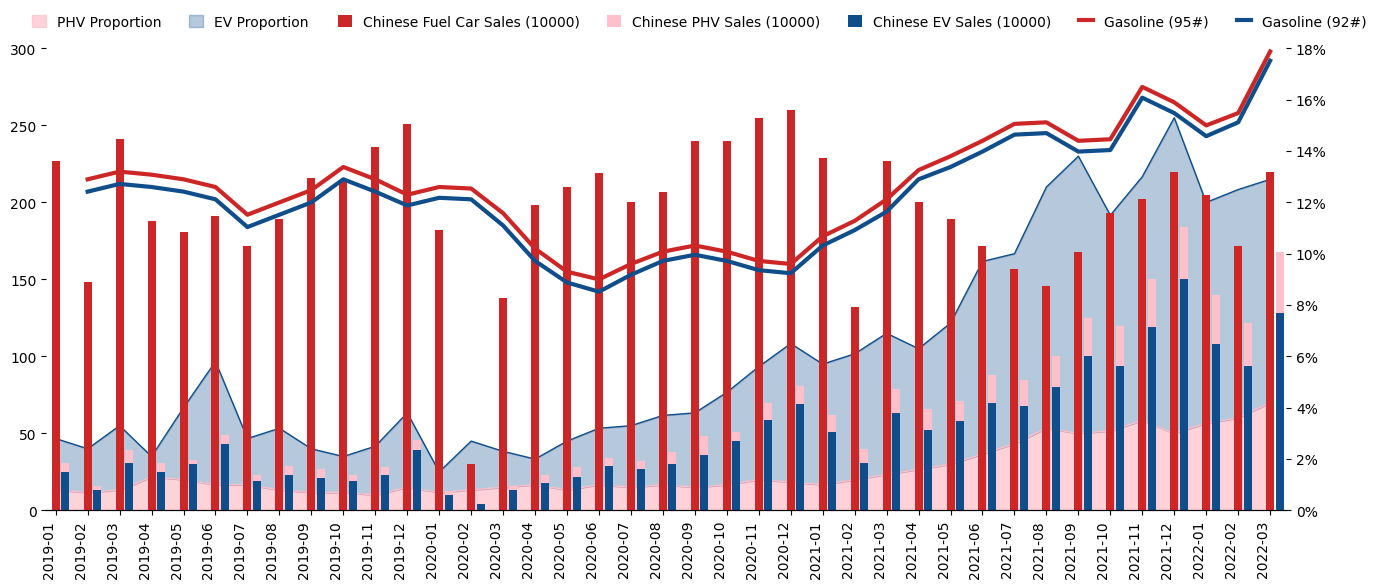

In [7]:
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.patch.set_alpha(0) 

# --- stack area ---
ax2 = ax1.twinx()  

ax2.patch.set_alpha(0) 
ax2.plot(np.arange(len(xtick)), phv_proportion, color='pink', linewidth=1)  # EV edge
ax2.plot(np.arange(len(xtick)), ev_proportion + phv_proportion, color='#104E8B', linewidth=1)  # PHV edge
ax2.fill_between(np.arange(len(xtick)), 0, phv_proportion, color='pink', alpha=0.7, label='PHV Proportion',zorder=0)  # EV above
ax2.fill_between(np.arange(len(xtick)), phv_proportion, ev_proportion + phv_proportion, color='#104E8B', alpha=0.3, label='EV Proportion',zorder=1)  

ax2.set_ylim(0, 0.18)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
ax2.legend(ncol=2, bbox_to_anchor=(0.1, 1.1), loc='upper center', frameon=False, handlelength=1, handleheight=1)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# --- bar chart ---
bar_width = 0.25
x_fuel = np.arange(len(xtick))
x_ev_phv = x_fuel + 0.3 # location for stack bar

ax1.bar(x_fuel, fuel_car_sales, color='#CD2626', label='Chinese Fuel Car Sales (10000)', width=bar_width, zorder=1)
ax1.bar(x_ev_phv, ev_sales, color='#104E8B', label='Chinese EV Sales (10000)', width=bar_width, bottom=0, zorder=2)
ax1.bar(x_ev_phv, phv_sales, color='pink', label='Chinese PHV Sales (10000)', width=bar_width, bottom=ev_sales, zorder=3)

# --- line chart ---
ax1.plot(months_with_gap, gasoline95_with_gap, label='Gasoline (95#)', color='#CD2626', linewidth=3, zorder=4)
ax1.plot(months_with_gap, gasoline92_with_gap, label='Gasoline (92#)', color='#104E8B', linewidth=3, zorder=5)

# set x-axis
ax1.set_xticks(np.arange(len(xtick)))
ax1.set_xticklabels(xtick, rotation=90, ha="right")
ax1.set_ylim(0, 300)
ax1.set_xlim(-0.3, len(xtick)-0.5)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.set_zorder(0)
ax1.set_zorder(1)

# legend order
handles, labels = ax1.get_legend_handles_labels()
ordered_handles = [handles[2],handles[4], handles[3], handles[0], handles[1]]
ordered_labels = [labels[2], labels[4], labels[3], labels[0], labels[1]]
ax1.legend(ordered_handles, ordered_labels, ncol=6, bbox_to_anchor=(0.65, 1.1), loc='upper center', frameon=False, handlelength=1, handleheight=1)

# plt.show()
plt.savefig('reproduction.svg', bbox_inches='tight')

### **3. Improvements Realisation**

#### **3.1. Step1: Separate the original graph.**

Problem to solve: 
- The amount of information in the graph is too large, and includes multiple types of charts, which can cause cognitive load on readers.
- The **double y-axes** result in poor data readability, and readers may confuse which data corresponds to which y-axis.

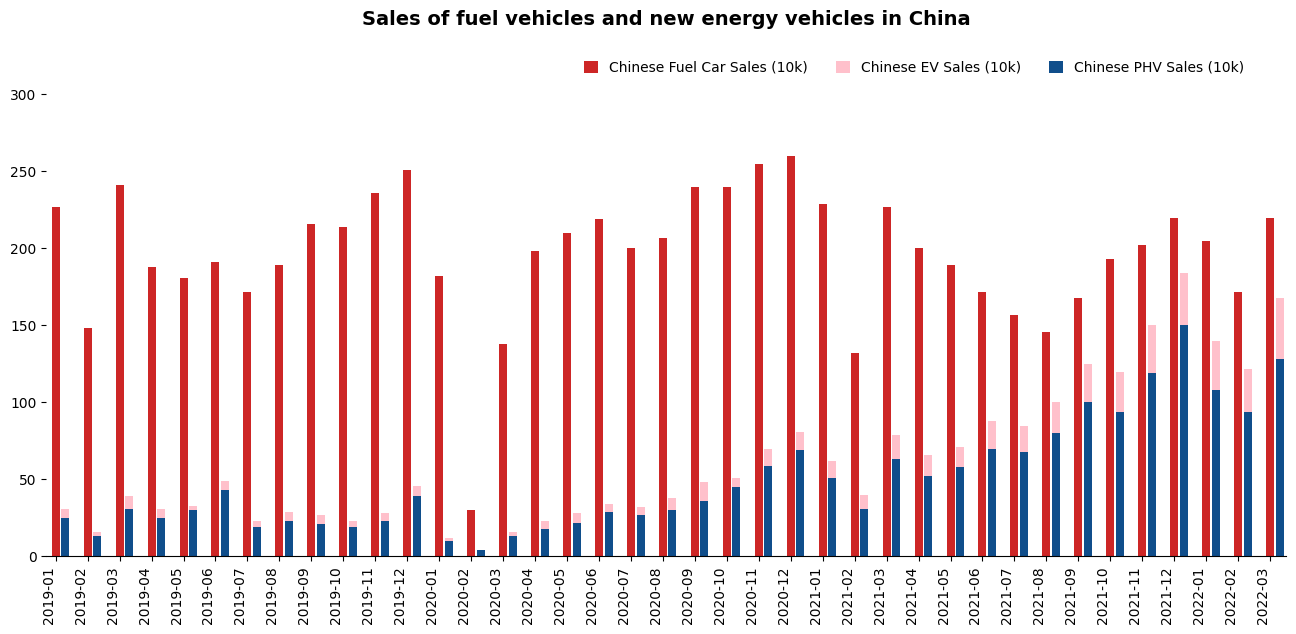

In [8]:
fig_1, ax_1 = plt.subplots(figsize=(16, 6))
bar_width = 0.25
interval = 0.3
colors = ['#CD2626', '#104E8B', 'pink']
barchart(ax_1,colors, bar_width, interval, y_top=False)
plt.show()

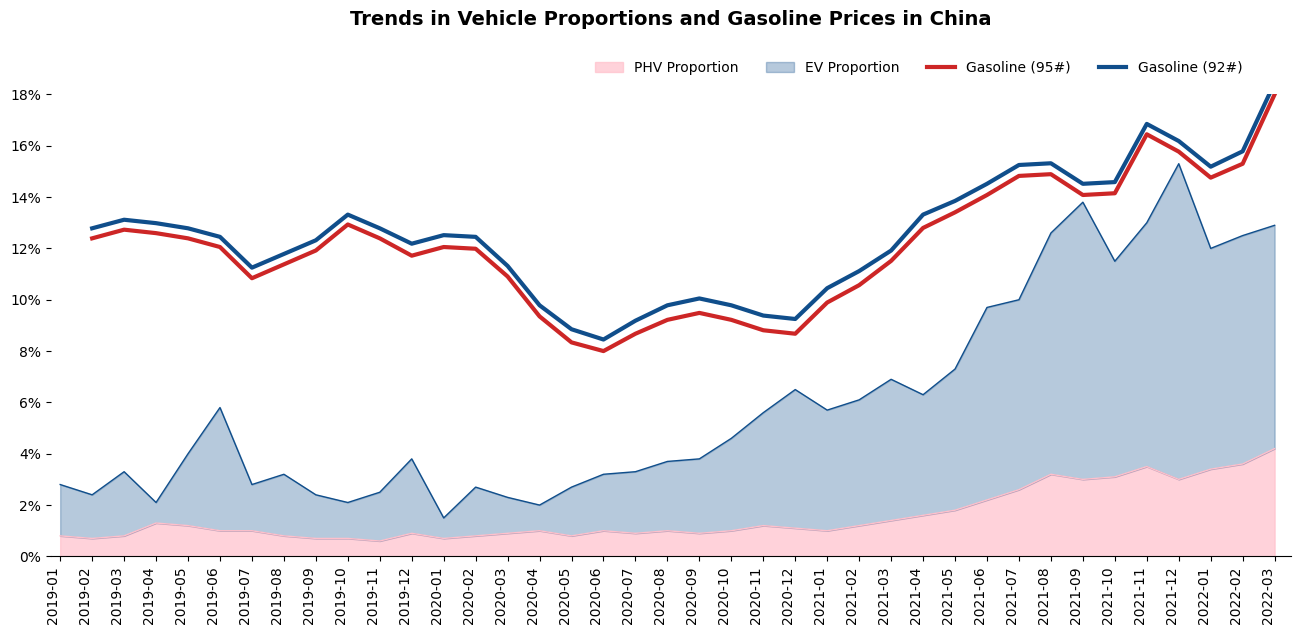

In [9]:
fig_2, ax_2 = plt.subplots(figsize=(16, 6))


plot_stacked_chart_with_gasoline(
    ax=ax_2,
    xtick=xtick,
    phv_proportion=phv_proportion,
    ev_proportion=ev_proportion,
    gasoline95_with_gap=gasoline95_with_gap,
    gasoline92_with_gap=gasoline92_with_gap,
    color_phv='pink',
    color_ev='#104E8B',
    color_gasoline95='#CD2626', color_gasoline92='#104E8B', alpha_phv=0.7, alpha_ev=0.3
)

plt.show()

Problem to solve:
- **Time-series data** should be presented using line charts, but the original graph uses bar chart, which is not conducive to observing trends.

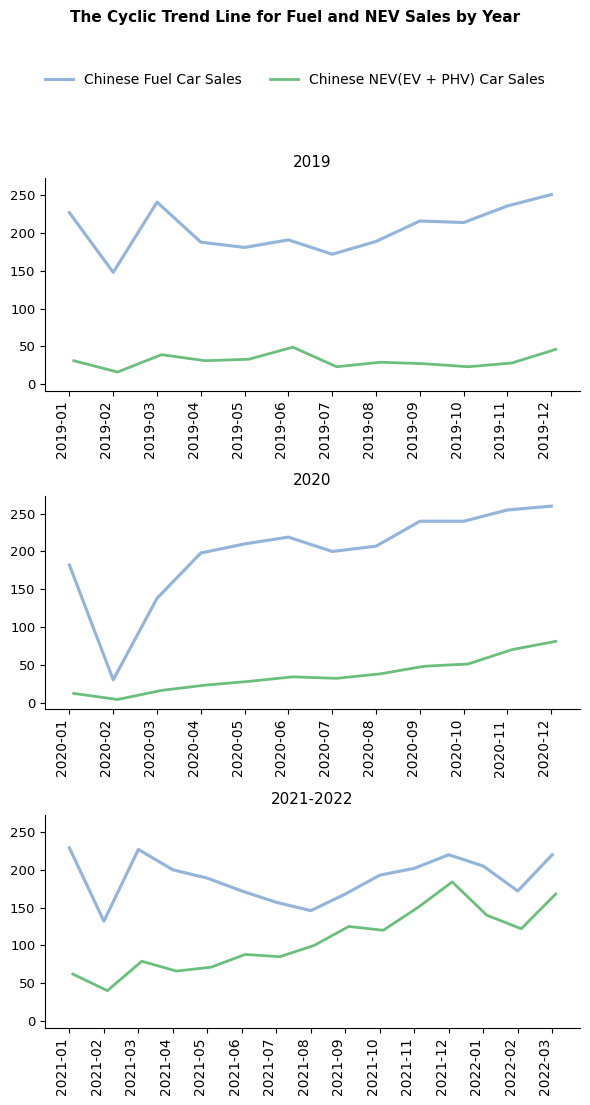

In [10]:
fuel_car_sales = np.array(df['Fuel Sale'], dtype=float)
ev_sales = np.array(df['EV Sale'], dtype=float)
phv_sales = np.array(df['PHV Sale'], dtype=float)

xtick = pd.date_range(start='2019-01', end='2022-04', freq='ME')
xtick = xtick.strftime('%Y-%m')
#xtick_labels = [f'{date[5:]}' if date[5:] != '01' else date for date in xtick]
xtick_labels = [date for date in xtick]

years = ['2019', '2020', '2021-2022']  # divide dates into three segments
split_indices = [12, 24, len(xtick_labels)]
data_slices = [(0, split_indices[0]), (split_indices[0], split_indices[1]), (split_indices[1], split_indices[2])]

axes, fig = plot_cyclic_trends(fuel_car_sales, ev_sales, phv_sales, xtick_labels, years, data_slices)
plt.show()

#### **3.2. Step2: Adjust the xticks.**

In the xticks dates, we will retain only the necessary years for division, while the rest will display only the months.

Problem to solve:
- The x-axis scale labels are redundant, and unnecessary year information should be removed to improve the **data-ink ratio**.
- The x-axis text labels in the graph are **rotated** 90 degrees, which makes them hard to read.

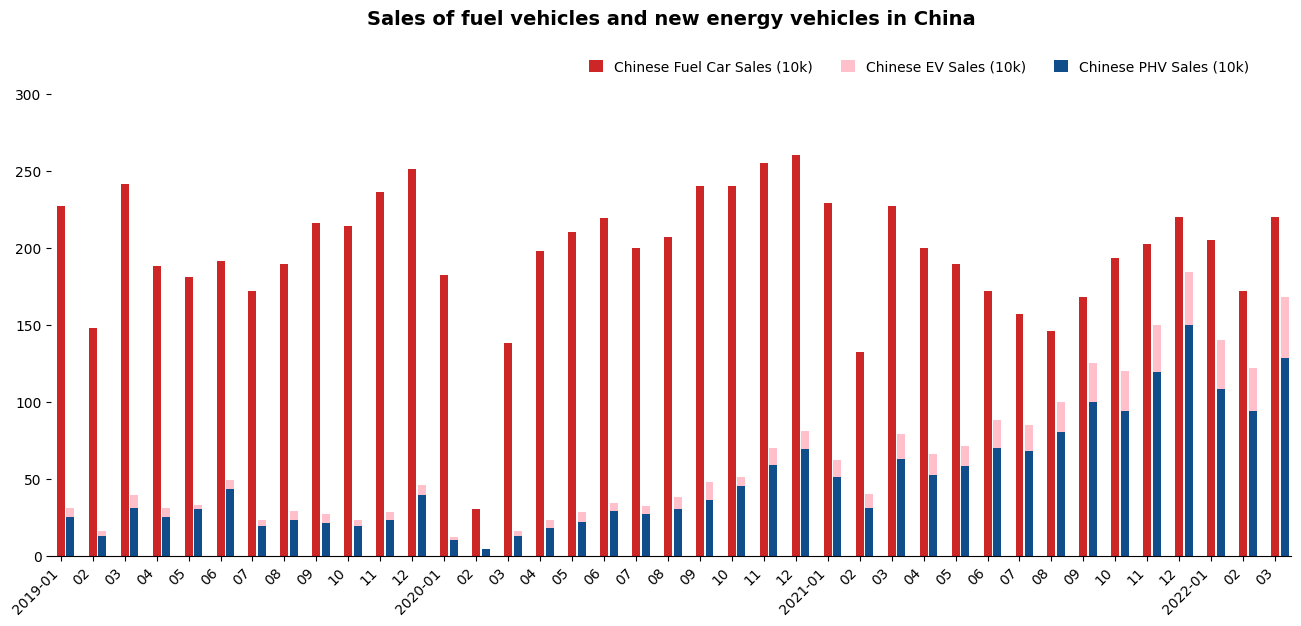

In [11]:
fig_1, ax_1 = plt.subplots(figsize=(16, 6))

barchart(ax_1,colors, bar_width, interval, y_top=False, date_change = True) 
plt.show()

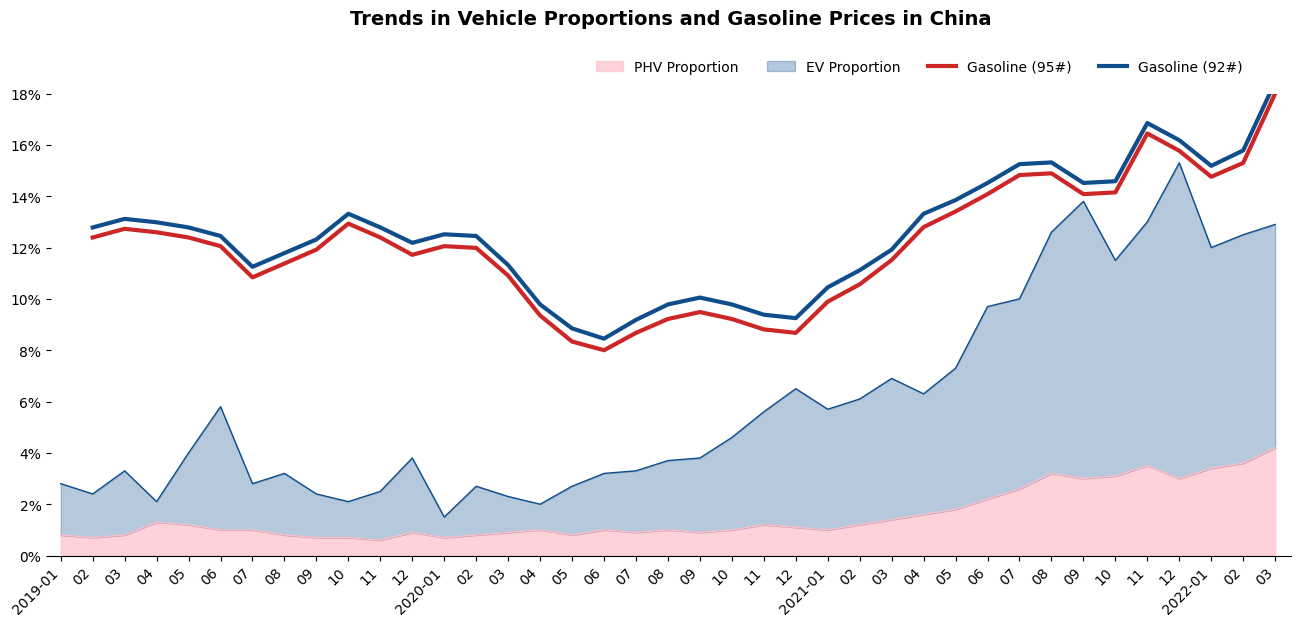

In [12]:
fig_2, ax_2 = plt.subplots(figsize=(16, 6))


plot_stacked_chart_with_gasoline(
    ax=ax_2,
    xtick=xtick,
    phv_proportion=phv_proportion,
    ev_proportion=ev_proportion,
    gasoline95_with_gap=gasoline95_with_gap,
    gasoline92_with_gap=gasoline92_with_gap,
    color_phv='pink',
    color_ev='#104E8B',
    color_gasoline95='#CD2626', color_gasoline92='#104E8B', alpha_phv=0.7, alpha_ev=0.3,
    date_change = True
)

plt.show()

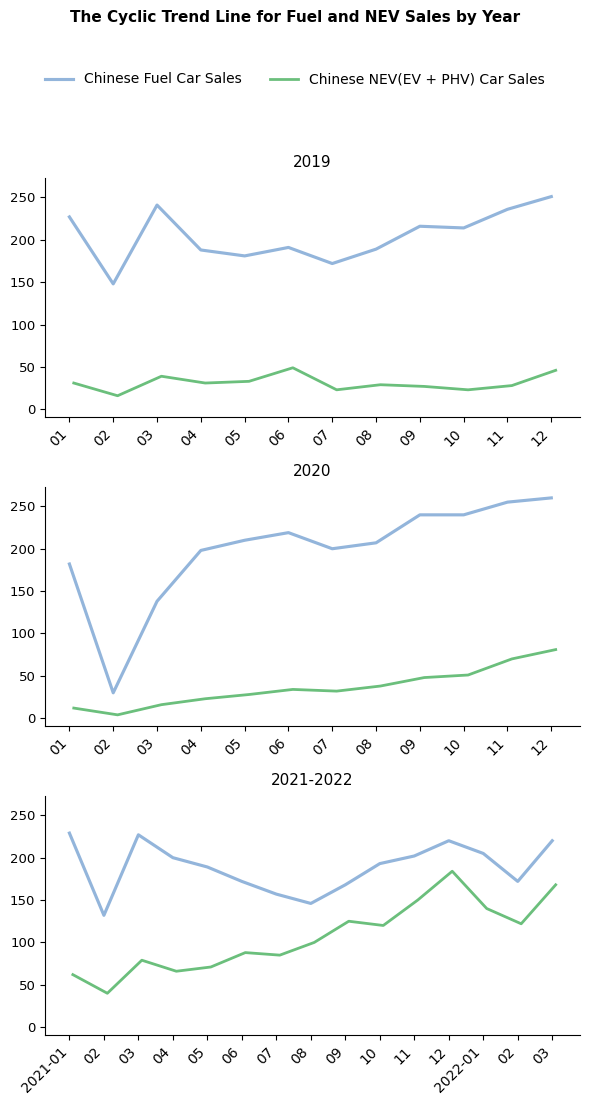

In [13]:
xtick_labels = [f'{date[5:]}' if date[5:] != '01' else date for date in xtick]
axes, fig = plot_cyclic_trends(fuel_car_sales, ev_sales, phv_sales, xtick_labels, years, data_slices, date_change =True, x_rotation = 45)
plt.show()

#### **3.3. Step3: Add the y-axis labels.**

Problem to solve:
- The graph lacks the **y-axis labels**. Graphs should clearly inform readers about the subject and what the axes represent.

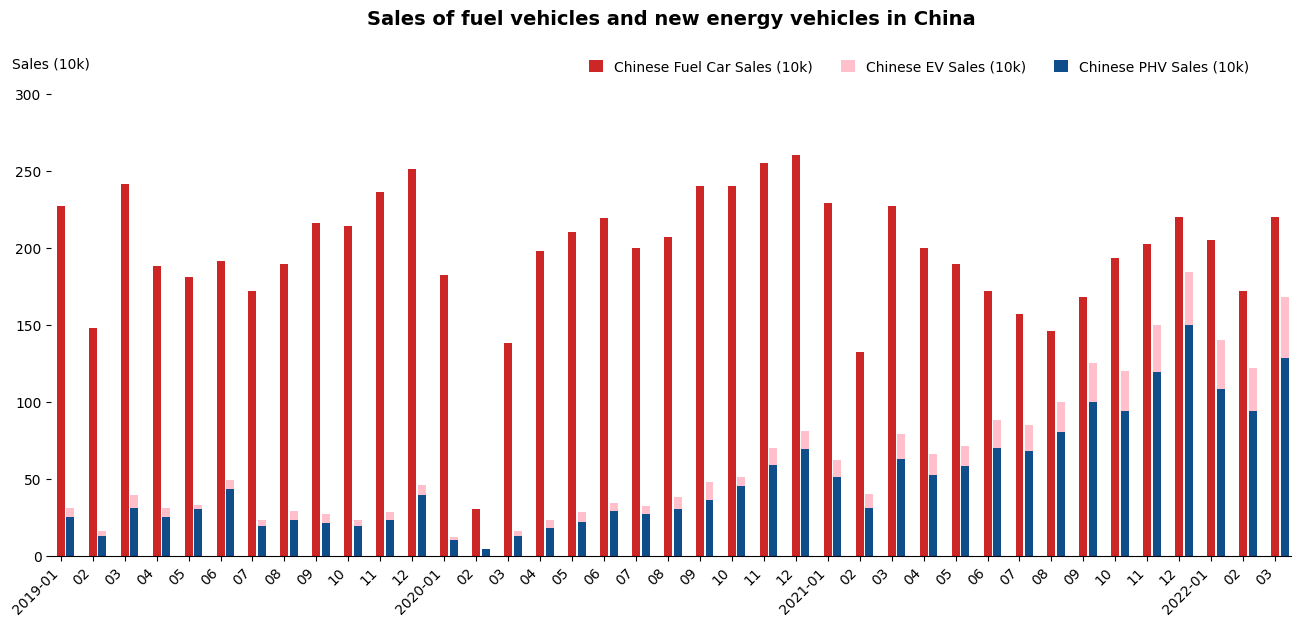

In [14]:
fig_1, ax_1 = plt.subplots(figsize=(16, 6))

barchart(ax_1,colors, bar_width, interval, y_top=True, date_change = True) 
plt.show()

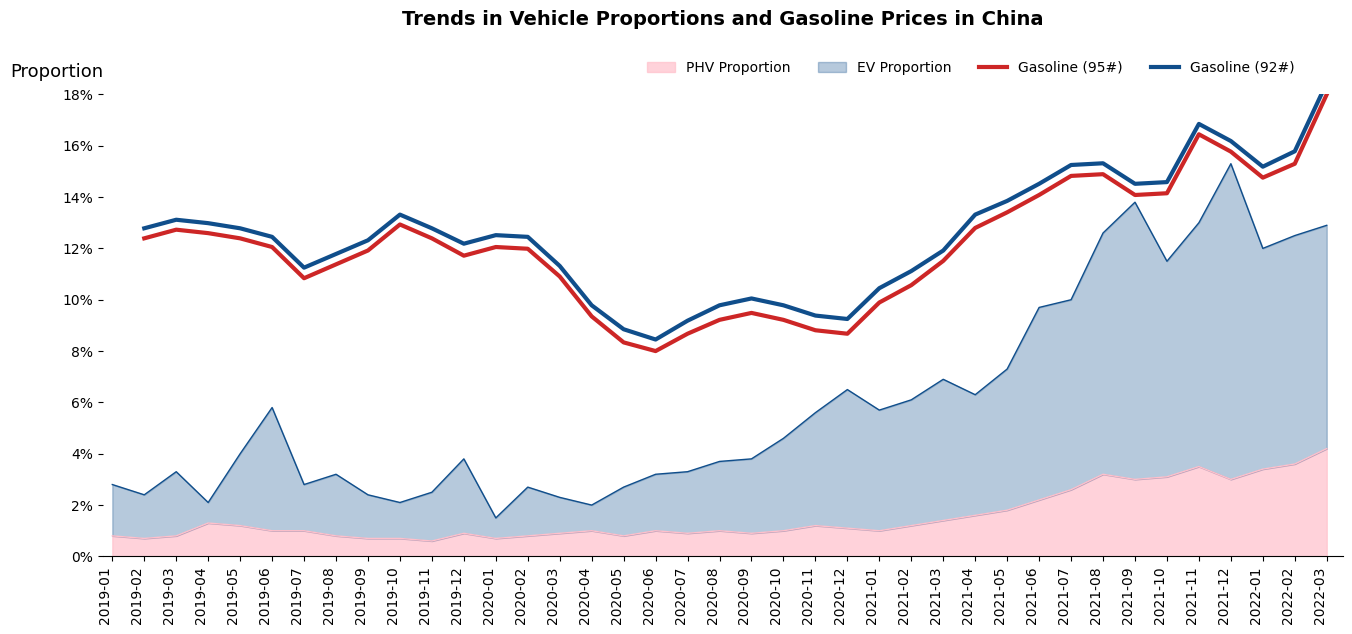

In [15]:
fig_2, ax_2 = plt.subplots(figsize=(16, 6))

plot_stacked_chart_with_gasoline(
    ax=ax_2,
    xtick=xtick,
    phv_proportion=phv_proportion,
    ev_proportion=ev_proportion,
    gasoline95_with_gap=gasoline95_with_gap,
    gasoline92_with_gap=gasoline92_with_gap,
    color_phv='pink',
    color_ev='#104E8B',
    color_gasoline95='#CD2626', color_gasoline92='#104E8B',alpha_phv=0.7, alpha_ev=0.3 
)
ax_2.set_ylabel("Proportion", rotation=0, y=1.03, fontsize=13)
plt.show()

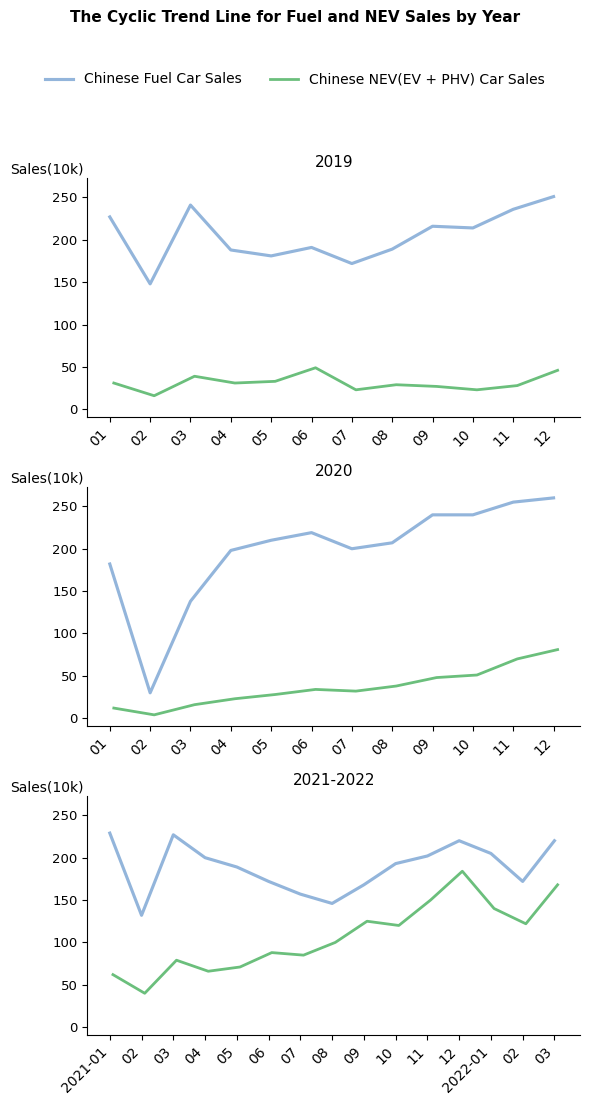

In [16]:
axes, fig = plot_cyclic_trends(fuel_car_sales, ev_sales, phv_sales, xtick_labels, years, data_slices, y_top = True, date_change =True, x_rotation = 45)
plt.show()

#### **3.4. Step4: Adjust the bar width of the bar chart.**

Problem to solve:
- The bars in the original graph are too narrow and should be widened to achieve the **golden ratio**.

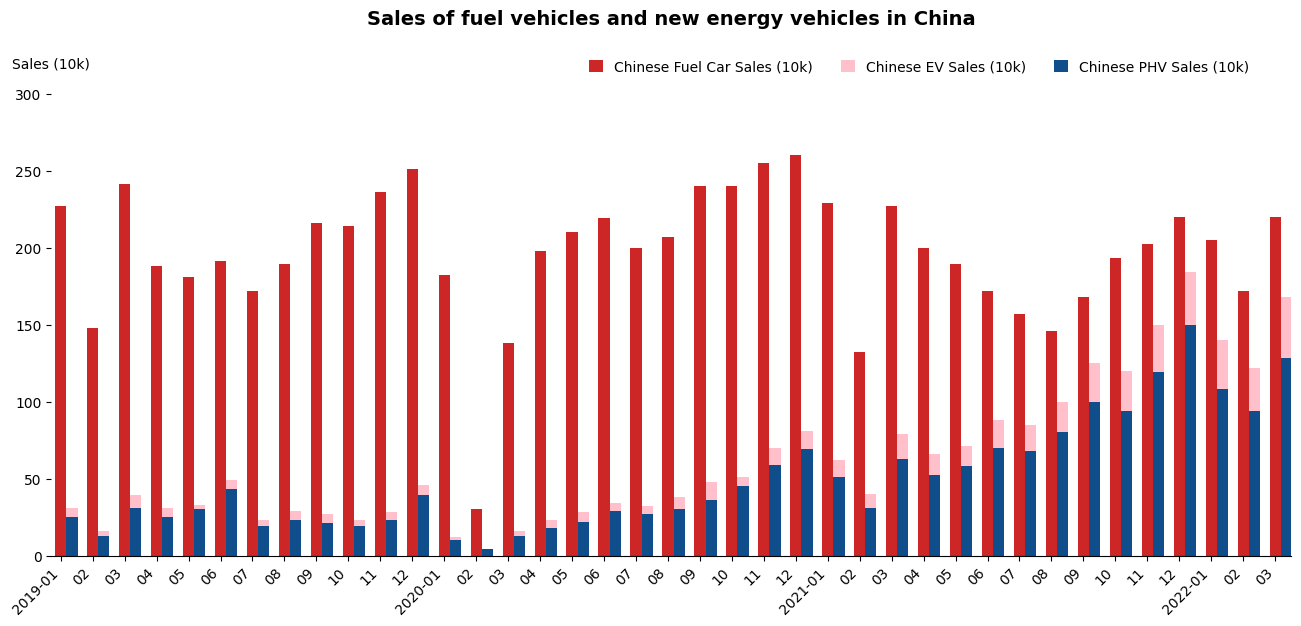

In [17]:
fig_1, ax_1 = plt.subplots(figsize=(16, 6))

bar_width = 0.35
interval = 0.35

barchart(ax_1,colors, bar_width, interval, y_top=True, date_change = True)
plt.show()

#### **3.5. Step5: Adjust the color of the charts.**

Problem to solve:
- **Visual variables** (such as color, shape, and shading) should only be used for data variations. Different data should be represented by different colors. However, in the graph, gasoline and new energy vehicles both use the same red and blue color scheme, making it difficult for readers to distinguish between them.

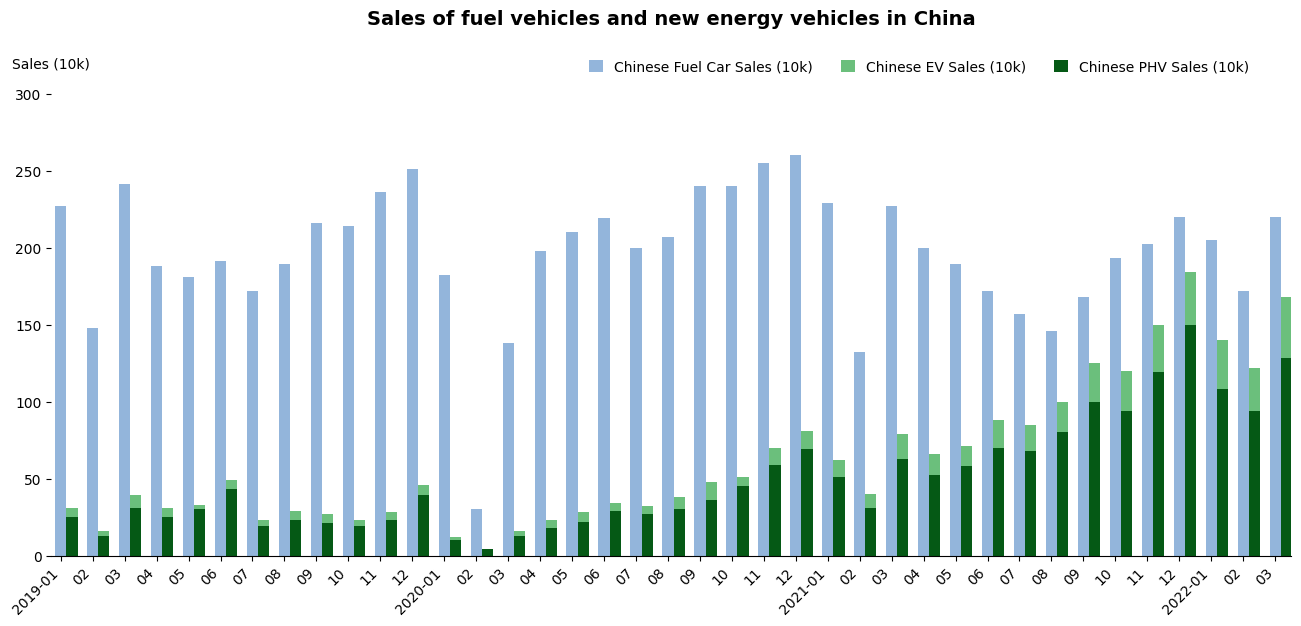

In [18]:
fig_1, ax_1 = plt.subplots(figsize=(16, 6))

colors= ['#93B5DB', '#055915', '#6BBF7C']

barchart(ax_1,colors, bar_width, interval, y_top=True, date_change = True)
plt.show()

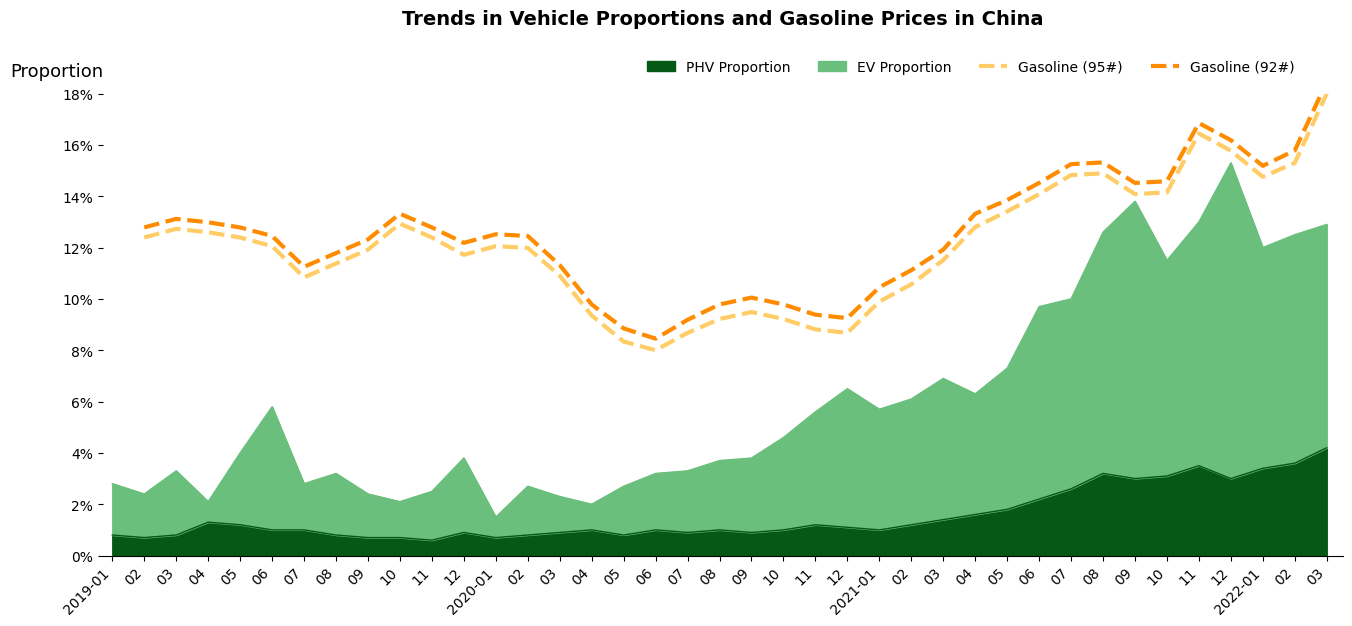

In [19]:
fig_2, ax_2 = plt.subplots(figsize=(16, 6))

plot_stacked_chart_with_gasoline(
    ax=ax_2,
    xtick=xtick,
    phv_proportion=phv_proportion,
    ev_proportion=ev_proportion,
    gasoline95_with_gap=gasoline95_with_gap,
    gasoline92_with_gap=gasoline92_with_gap,
    color_phv='#055915',
    color_ev='#6BBF7C',
    color_gasoline95='#FFCC66', color_gasoline92='#FF8C00', alpha_phv=1, alpha_ev=1,linestyle='--',
    date_change = True
)
ax_2.set_ylabel("Proportion", rotation=0, y=1.03, fontsize=13)

plt.show()

#### **3.6. Step6: Add the annotation to the charts.(the final result)**

Problem to solve:
- The graph lacks **descriptive text** and does not guide readers to focus on important information, which may cause them to spend too much time on irrelevant details.
- The **trend lines** for the two oil prices are fitted and do not correspond to the y-axes on either side, and their heights have no meaning. We cannot calculate its **lie factor**. This can also **mislead** readers.

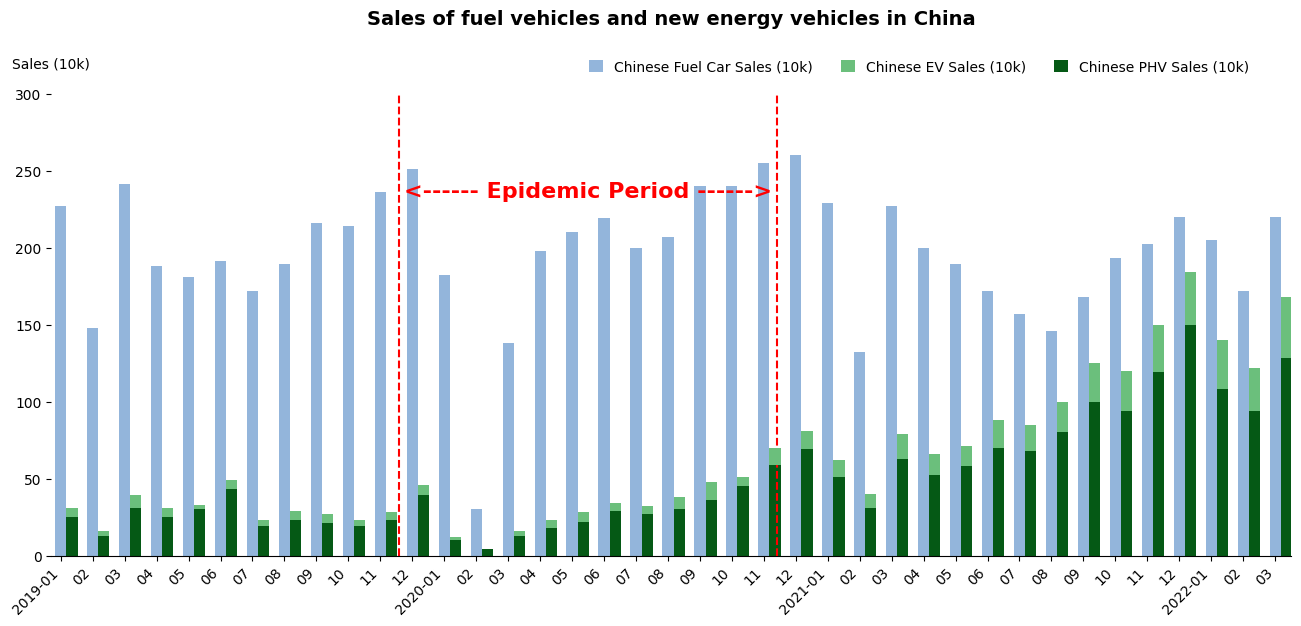

In [20]:
fig_1, ax_1 = plt.subplots(figsize=(16, 6))
colors= ['#93B5DB', '#055915', '#6BBF7C']

barchart(ax_1,colors, bar_width, interval, y_top=True, date_change = True)

start_idx = xtick.tolist().index('2019-12') 
end_idx = xtick.tolist().index('2020-11') 

ax_1.axvline(x=start_idx-0.4, color='red', linestyle='--', linewidth=1.5)
ax_1.axvline(x=end_idx+0.4, color='red', linestyle='--', linewidth=1.5)

ax_1.text((start_idx + end_idx) / 2 , 230, '<------ Epidemic Period ------>', ha='center', va='bottom', fontsize=16, color='r', fontweight='bold', zorder=4)

plt.savefig('barchart.svg', bbox_inches='tight')
plt.show()

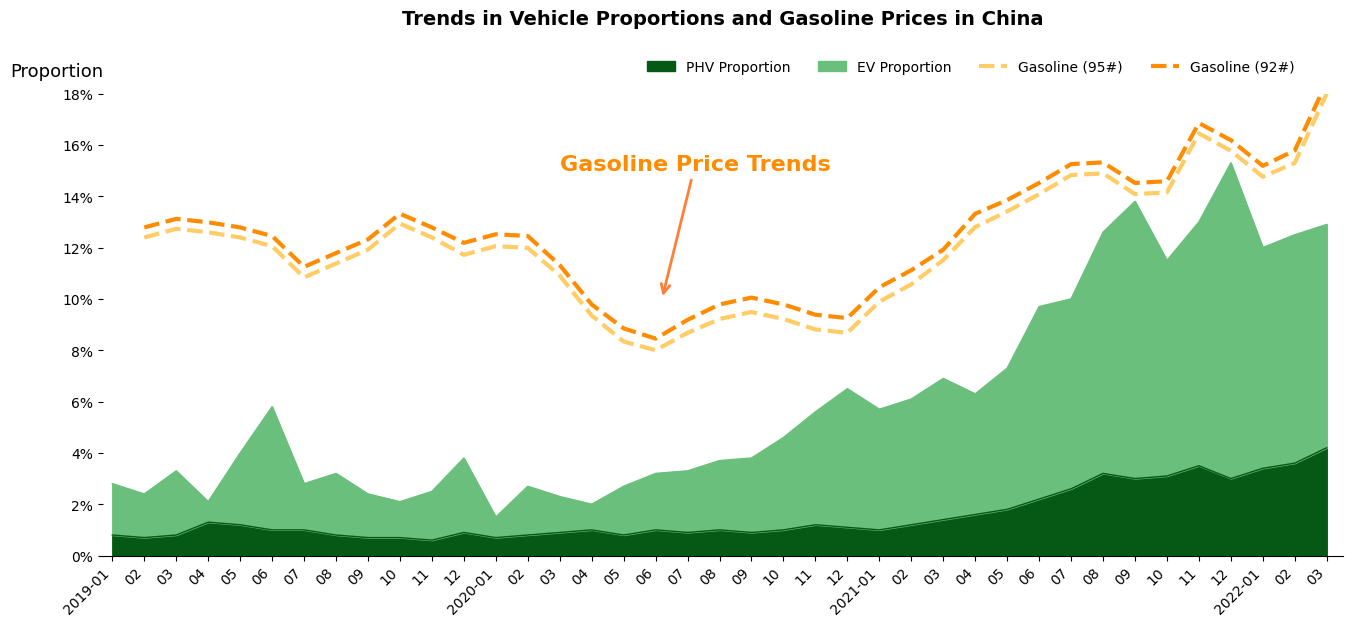

In [21]:
fig_2, ax_2 = plt.subplots(figsize=(16, 6))

plot_stacked_chart_with_gasoline(
    ax=ax_2,
    xtick=xtick,
    phv_proportion=phv_proportion,
    ev_proportion=ev_proportion,
    gasoline95_with_gap=gasoline95_with_gap,
    gasoline92_with_gap=gasoline92_with_gap,
    color_phv='#055915',
    color_ev='#6BBF7C',
    color_gasoline95='#FFCC66', color_gasoline92='#FF8C00', alpha_phv=1, alpha_ev=1,linestyle='--',
    date_change = True
)
ax_2.set_ylabel("Proportion", rotation=0, y=1.03, fontsize=13)
ax_2.annotate('Gasoline Price Trends', 
            xy=(17.2, 0.10), 
            xytext=(14, 0.15),
            arrowprops=dict(edgecolor='#FF7F37', arrowstyle='->', lw=2),
            fontsize=16, fontweight='bold', color='#FF8C00') 
plt.show()

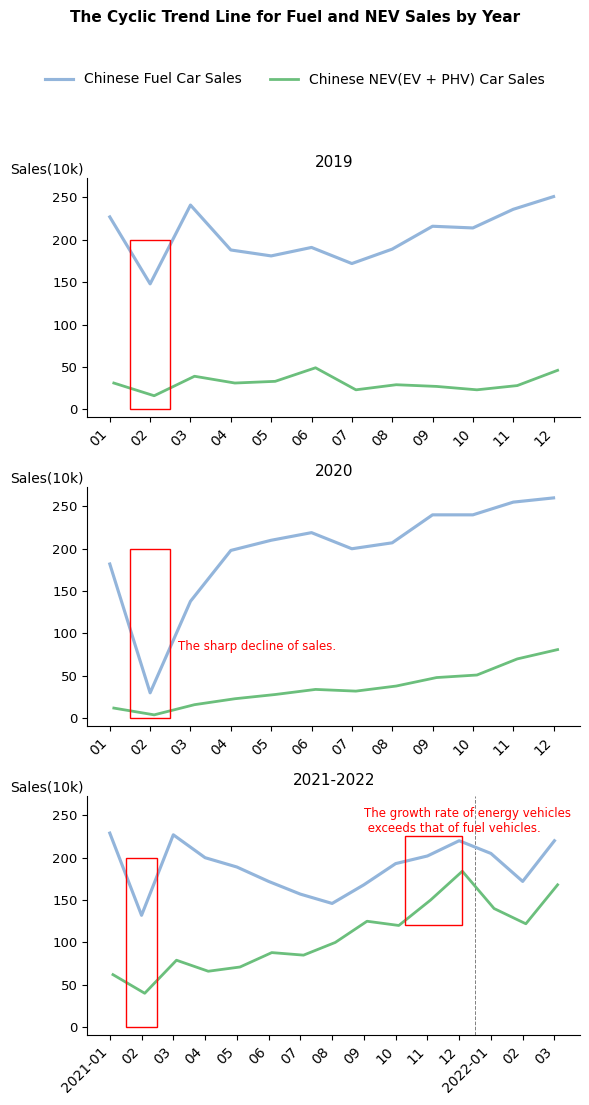

In [22]:
axes, fig = plot_cyclic_trends(fuel_car_sales, ev_sales, phv_sales, xtick_labels, years, data_slices, y_top = True, date_change =True, x_rotation = 45)

year_2021_end = np.where(np.array(xtick[data_slices[2][0]:data_slices[2][1]]) == '2021-12')[0][0]
year_2022_start = np.where(np.array(xtick[data_slices[2][0]:data_slices[2][1]]) == '2022-01')[0][0]
midpoint = (year_2021_end + year_2022_start) / 2
axes[2].axvline(x=midpoint, color='gray', linestyle='--', linewidth=0.7)

axes[2].add_patch(plt.Rectangle((9.3, 120), 1.8, 105, edgecolor='r', facecolor='none', linewidth=1, zorder= 8))
axes[2].text(8, 230, 'The growth rate of energy vehicles\n exceeds that of fuel vehicles.', color='r',  fontsize= 8.5)

axes[1].text(1.7, 80, 'The sharp decline of sales.', color='r',  fontsize= 8.5)
for ax in axes:
    ax.add_patch(plt.Rectangle((0.5, 0.2), 1, 200, edgecolor='r', facecolor='none', linewidth=1, zorder= 8))

plt.show()

### **4. Conclusion**

**In conclusion**, we separated the original into stacked area + gasoline price trend lines, bar chart, and line chart, revealing more detailed background of our project, the overall sales volume changes for different vehicle and the cyclical regularity on sales volume for each year respectively. Through the modification and further exploration, we found **more insights** beyond "the increase market penetration rate of energy vehicles as gasoline price increasing". **The epidemic, policies, Spring Festival, and other factors also have a significant impact on overall vehicle sales, and can be reflected in our visualization.**

**This is our call to action**

- The government can further optimize subsidy policies for new energy vehicles and strengthen infrastructure development to promote the widespread adoption of new energy vehicles.

- Given the typical decline in car sales every February, companies can launch promotional activities for new energy vehicles during the Spring Festival to stimulate consumer demand.

- Society should strengthen education and awareness of environmental protection, encouraging more people to pay attention to and purchase new energy vehicles, thus promoting the realization of sustainable transportation.